In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
from collections import Counter
import time
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load CSV files into separate DataFrames
db1 = pd.read_csv('caltech_clean.csv')
db2 = pd.read_csv('jpl_clean.csv')
db3 = pd.read_csv('office1_clean.csv')

# Combine them using concat
db = pd.concat([db1, db2, db3], ignore_index=True)
db.head()

,Unnamed: 0,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture
0,0,7.187222,8.451667,8.450278,4.279,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222
1,1,7.718056,16.609722,11.410000,11.769,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056
2,2,7.867222,13.912778,12.869444,0.889,2,303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,8.414444,12.320833,12.319444,13.430,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111
4,4,8.984722,16.126944,12.654722,12.001,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389


In [102]:
#No user inputs

X = db[["connectionTime", "siteID", "spaceID"]].values
X

y = db['disconnectTime'].values
y

#splitting dataset into train, validation and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
train_linreg = LinearRegression().fit(X_train, y_train)

# Train a Neural Network (MLPClassifier)
train_nn = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', max_iter=1000, random_state=0)
train_nn.fit(X_train, y_train)

# Predictions for Logistic Regression
pred_linreg = train_linreg.predict(X_test)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, pred_linreg))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, pred_linreg))
print("R² Score:", r2_score(y_test, pred_linreg))

# Predictions for Neural Network
pred_nn = train_nn.predict(X_test)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, pred_nn))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, pred_nn))
print("R² Score:", r2_score(y_test, pred_nn))

For Linear Regression: 
Mean Squared Error (MSE): 9.43029111377874
Mean Absolute Error (MAE): 2.374962177153633
R² Score: 0.09553101694677113
For Neural Network: 
Mean Squared Error (MSE): 8.847735051293297
Mean Absolute Error (MAE): 2.274057358545137
R² Score: 0.15140457196755241


In [126]:
#Drop rows with NaN data
db_cleaned = db.dropna()
db_cleaned.head()

,Unnamed: 0,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture
0,0,7.187222,8.451667,8.450278,4.279,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222
1,1,7.718056,16.609722,11.410000,11.769,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056
3,3,8.414444,12.320833,12.319444,13.430,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111
4,4,8.984722,16.126944,12.654722,12.001,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389
5,5,9.014167,18.164722,9.804722,2.115,2,321,891.0,400.0,8.00,20.0,36.0,9.014722,1.0,9.614167


In [119]:
#Only disconnectionTime as output

X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile", 
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
X2

y2 = db_cleaned['disconnectTime'].values
y2

#splitting dataset into train, validation and test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

# Train Logistic Regression model
train_linreg2 = LinearRegression().fit(X2_train, y2_train)

# Train a Neural Network (MLPClassifier)
train_nn2 = MLPRegressor(hidden_layer_sizes=(50,50), activation='relu', max_iter=1000, random_state=0)
train_nn2.fit(X2_train, y2_train)

# Predictions for Logistic Regression
pred_linreg2 = train_linreg2.predict(X2_test)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", round(mean_squared_error(y2_test, pred_linreg2) ,2))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y2_test, pred_linreg2), 2))
print("R² Score:", round(r2_score(y2_test, pred_linreg2), 4))

# Predictions for Neural Network
pred_nn2 = train_nn2.predict(X2_test)
print("For Neural Network: ")
print("Mean Squared Error (MSE):",round(mean_squared_error(y2_test, pred_nn2), 2))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y2_test, pred_nn2), 2))
print("R² Score:", round(r2_score(y2_test, pred_nn2), 4))

For Linear Regression: 
Mean Squared Error (MSE): 8.41
Mean Absolute Error (MAE): 1.97
R² Score: 0.0984
For Neural Network: 
Mean Squared Error (MSE): 6.89
Mean Absolute Error (MAE): 1.8
R² Score: 0.261


In [ ]:
#DisconnectionTIme and KWHDelivered as output

X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile", 
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
X2

y2 = db_cleaned[['disconnectTime', 'kWhDelivered']].values
y2

#splitting dataset into train, validation and test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

# Train Logistic Regression model
train_linreg2 = LinearRegression().fit(X2_train, y2_train)

# Train a Neural Network (MLPClassifier)
#train_nn2 = MLPRegressor(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, random_state=0)
train_nn2 = MLPRegressor(hidden_layer_sizes=(50,50),  # 3 layers: 500 → 250 → 100 neurons
                         activation='relu',                   # Use ReLU for non-linearity
                         solver='adam',                       # Adam optimizer for efficiency
                         alpha=0.0001,                        # L2 regularization (prevents overfitting)
                         max_iter=1000,                       # Increase iterations to ensure convergence
                         random_state=0)
train_nn2.fit(X2_train, y2_train)

# Predictions for Logistic Regression
pred_linreg2 = train_linreg2.predict(X2_test)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_test, pred_linreg2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_test, pred_linreg2))
print("R² Score:", r2_score(y2_test, pred_linreg2))

# Predictions for Neural Network
pred_nn2 = train_nn2.predict(X2_test)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_test, pred_nn2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_test, pred_nn2))
print("R² Score:", r2_score(y2_test, pred_nn2))

For Linear Regression: 
Mean Squared Error (MSE): 31.552815506953493
Mean Absolute Error (MAE): 3.5410096192818568
R² Score: 0.30789014713507923
For Neural Network: 
Mean Squared Error (MSE): 24.50354859456251
Mean Absolute Error (MAE): 3.0383482193937312
R² Score: 0.43695835398088856


In [122]:
#Add a cloumn for Load

db_cleaned['Load'] = abs(db_cleaned['kWhDelivered'] / (db_cleaned['disconnectTime'] - db_cleaned['connectionTime']))
db_cleaned.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_39024\3013468571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_cleaned['Load'] = abs(db_cleaned['kWhDelivered'] / (db_cleaned['disconnectTime'] - db_cleaned['connectionTime']))


,Unnamed: 0,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,siteID,spaceID,userID,userInputs/0/WhPerMile,userInputs/0/kWhRequested,userInputs/0/milesRequested,userInputs/0/minutesAvailable,userInputs/0/modifiedAt,userInputs/0/paymentRequired,userInputs/0/requestedDeparture,Load
0,0,7.187222,8.451667,8.450278,4.279,2,315,743.0,400.0,8.00,20.0,30.0,7.191944,1.0,7.687222,3.384095
1,1,7.718056,16.609722,11.410000,11.769,2,316,4269.0,400.0,16.00,40.0,60.0,7.865000,1.0,8.718056,1.323599
3,3,8.414444,12.320833,12.319444,13.430,2,323,3853.0,360.0,21.60,60.0,559.0,8.418889,1.0,17.731111,3.437958
4,4,8.984722,16.126944,12.654722,12.001,2,492,1470.0,292.0,20.44,70.0,400.0,8.990556,1.0,15.651389,1.680289
5,5,9.014167,18.164722,9.804722,2.115,2,321,891.0,400.0,8.00,20.0,36.0,9.014722,1.0,9.614167,0.231134


In [123]:
#disconnectionTime,KWHDelivered and Load as outputs

X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile", 
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
X2

y2 = db_cleaned[['disconnectTime', 'kWhDelivered', 'Load']].values
y2

#splitting dataset into train, validation and test data
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.2,random_state = 0)


# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

# Train Logistic Regression model
train_linreg2 = LinearRegression().fit(X2_train, y2_train)

# Train a Neural Network (MLPClassifier)
#train_nn2 = MLPRegressor(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, random_state=0)
train_nn2 = MLPRegressor(hidden_layer_sizes=(50,50),  # 3 layers: 500 → 250 → 100 neurons
                         activation='relu',                   # Use ReLU for non-linearity
                         solver='adam',                       # Adam optimizer for efficiency
                         alpha=0.0001,                        # L2 regularization (prevents overfitting)
                         max_iter=1000,                       # Increase iterations to ensure convergence
                         random_state=0)
train_nn2.fit(X2_train, y2_train)

# Predictions for Logistic Regression
pred_linreg2 = train_linreg2.predict(X2_test)
print("For Linear Regression: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_test, pred_linreg2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_test, pred_linreg2))
print("R² Score:", r2_score(y2_test, pred_linreg2))

# Predictions for Neural Network
pred_nn2 = train_nn2.predict(X2_test)
print("For Neural Network: ")
print("Mean Squared Error (MSE):", mean_squared_error(y2_test, pred_nn2))
print("Mean Absolute Error (MAE):", mean_absolute_error(y2_test, pred_nn2))
print("R² Score:", r2_score(y2_test, pred_nn2))

For Linear Regression: 
Mean Squared Error (MSE): 23.76877566796291
Mean Absolute Error (MAE): 2.7383173061713824
R² Score: 0.26547320745668973
For Neural Network: 
Mean Squared Error (MSE): 19.383641856364537
Mean Absolute Error (MAE): 2.4383219793325965
R² Score: 0.3488371592284781


In [127]:
#Best solution

X_final = db_cleaned[["connectionTime","doneChargingTime", "siteID", "spaceID", 
                    "userID", "userInputs/0/WhPerMile", "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
                    "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt","userInputs/0/paymentRequired", 
                    "userInputs/0/requestedDeparture"
                    ]].values


y_final = db_cleaned[['disconnectTime', 'kWhDelivered']].values


#splitting dataset into train, validation and test data
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=0)

# Extract doneChargingTime column from X_final (it is the second column: index 1)
done_charging_train = X_final_train[:, 1]  
done_charging_test = X_final_test[:, 1]

# Remove doneChargingTime from X_final_train and X_final_test before training
X_final_train = np.delete(X_final_train, 1, axis=1)
X_final_test = np.delete(X_final_test, 1, axis=1)

# Scale data
scaler = StandardScaler().fit(X_final_train)
X_final_train = scaler.transform(X_final_train)
X_final_test = scaler.transform(X_final_test)

y_scaler = StandardScaler().fit(y_final_train)
y_final_train = y_scaler.transform(y_final_train)
y_final_test = y_scaler.transform(y_final_test)

# Train Logistic Regression model
train_linreg_final = LinearRegression().fit(X_final_train, y_final_train)

# Train a Neural Network (MLPClassifier)
#train_nn2 = MLPRegressor(hidden_layer_sizes=(200,200), activation='relu', max_iter=1000, random_state=0)
train_nn_final = MLPRegressor(hidden_layer_sizes=(50,50),  # 3 layers: 500 → 250 → 100 neurons
                         activation='relu',                   # Use ReLU for non-linearity
                         solver='adam',                       # Adam optimizer for efficiency
                         alpha=0.0001,                        # L2 regularization (prevents overfitting)
                         max_iter=1000,                       # Increase iterations to ensure convergence
                         random_state=0)
train_nn_final.fit(X_final_train, y_final_train)

# Predictions for Logistic Regression
pred_linreg_final = train_linreg_final.predict(X_final_test)
print("For Linear Regression: Test data")
print("Mean Squared Error (MSE):", round(mean_squared_error(y_final_test, pred_linreg_final), 4))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_final_test, pred_linreg_final), 4))
print("R² Score:", round(r2_score(y_final_test, pred_linreg_final), 4))

# Predictions for Neural Network
pred_nn_final = train_nn_final.predict(X_final_test)
print("For Neural Network: Test data")
print("Mean Squared Error (MSE):", round(mean_squared_error(y_final_test, pred_nn_final), 4))
print("Mean Absolute Error (MAE):", round(mean_absolute_error(y_final_test, pred_nn_final), 4))
print("R² Score:", round(r2_score(y_final_test, pred_nn_final), 4))

For Linear Regression: Test data
Mean Squared Error (MSE): 0.6171
Mean Absolute Error (MAE): 0.5284
R² Score: 0.3234
For Neural Network: Test data
Mean Squared Error (MSE): 0.5189
Mean Absolute Error (MAE): 0.4706
R² Score: 0.4292


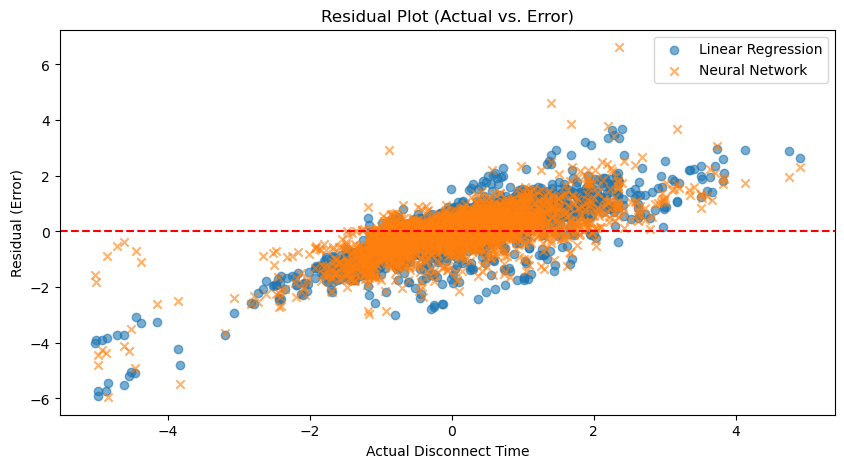

In [89]:
# Residuals (errors)
residuals_linreg_final = y_final_test - pred_linreg_final
residuals_nn_final = y_final_test - pred_nn_final

plt.figure(figsize=(10, 5))

plt.scatter(y_final_test, residuals_linreg_final, label="Linear Regression", alpha=0.6)
plt.scatter(y_final_test, residuals_nn_final, label="Neural Network", alpha=0.6, marker='x')

plt.axhline(y=0, color='red', linestyle='dashed')  # Perfect prediction line

plt.xlabel("Actual Disconnect Time")
plt.ylabel("Residual (Error)")
plt.title("Residual Plot (Actual vs. Error)")
plt.legend()
plt.show()

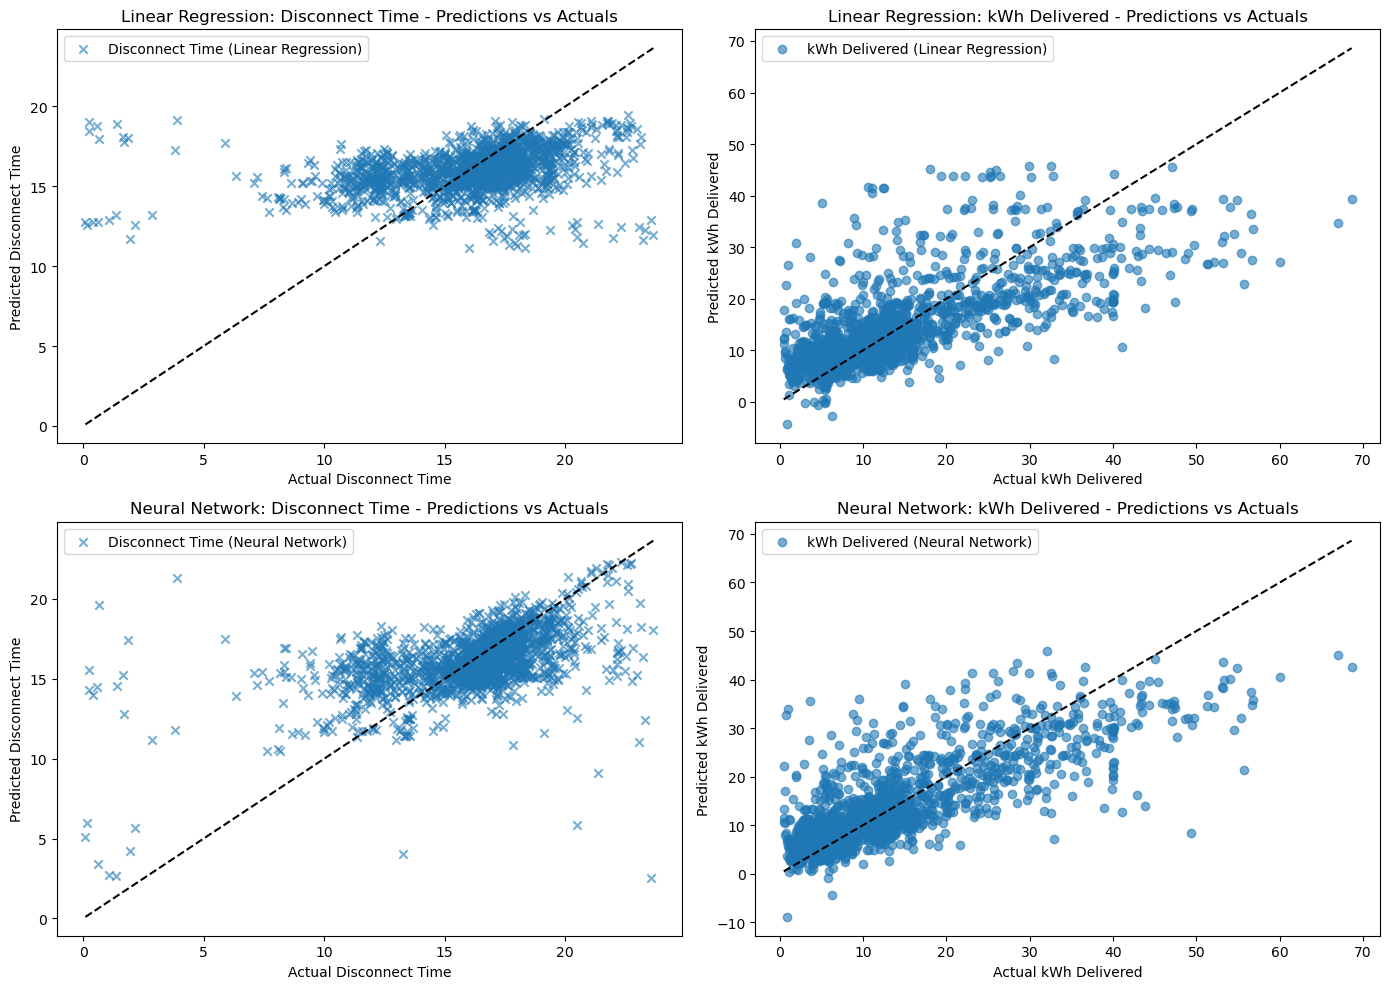

In [90]:
# Inverse transform the actual values (y_final_test) to the original scale
y_final_test_original = y_scaler.inverse_transform(y_final_test)

# Inverse transform the predictions (pred_linreg_final and pred_nn_final) to the original scale
pred_linreg_final_original = y_scaler.inverse_transform(pred_linreg_final)
pred_nn_final_original = y_scaler.inverse_transform(pred_nn_final)


# Create a 2x2 grid for subplots (2 rows and 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot Predictions vs Actuals for Disconnect Time (Linear Regression) - Top Left
axs[0, 0].scatter(y_final_test_original[:, 0], pred_linreg_final_original[:, 0], label='Disconnect Time (Linear Regression)', alpha=0.6, marker='x')
axs[0, 0].plot([min(y_final_test_original[:, 0]), max(y_final_test_original[:, 0])], 
               [min(y_final_test_original[:, 0]), max(y_final_test_original[:, 0])], color='black', linestyle='--')
axs[0, 0].set_title('Linear Regression: Disconnect Time - Predictions vs Actuals')
axs[0, 0].set_xlabel('Actual Disconnect Time')
axs[0, 0].set_ylabel('Predicted Disconnect Time')
axs[0, 0].legend()

# Plot Predictions vs Actuals for kWh Delivered (Linear Regression) - Top Right
axs[0, 1].scatter(y_final_test_original[:, 1], pred_linreg_final_original[:, 1], label='kWh Delivered (Linear Regression)', alpha=0.6)
axs[0, 1].plot([min(y_final_test_original[:, 1]), max(y_final_test_original[:, 1])], 
               [min(y_final_test_original[:, 1]), max(y_final_test_original[:, 1])], color='black', linestyle='--')
axs[0, 1].set_title('Linear Regression: kWh Delivered - Predictions vs Actuals')
axs[0, 1].set_xlabel('Actual kWh Delivered')
axs[0, 1].set_ylabel('Predicted kWh Delivered')
axs[0, 1].legend()

# Plot Predictions vs Actuals for Disconnect Time (Neural Network) - Bottom Left
axs[1, 0].scatter(y_final_test_original[:, 0], pred_nn_final_original[:, 0], label='Disconnect Time (Neural Network)', alpha=0.6, marker='x')
axs[1, 0].plot([min(y_final_test_original[:, 0]), max(y_final_test_original[:, 0])], 
               [min(y_final_test_original[:, 0]), max(y_final_test_original[:, 0])], color='black', linestyle='--')
axs[1, 0].set_title('Neural Network: Disconnect Time - Predictions vs Actuals')
axs[1, 0].set_xlabel('Actual Disconnect Time')
axs[1, 0].set_ylabel('Predicted Disconnect Time')
axs[1, 0].legend()

# Plot Predictions vs Actuals for kWh Delivered (Neural Network) - Bottom Right
axs[1, 1].scatter(y_final_test_original[:, 1], pred_nn_final_original[:, 1], label='kWh Delivered (Neural Network)', alpha=0.6)
axs[1, 1].plot([min(y_final_test_original[:, 1]), max(y_final_test_original[:, 1])], 
               [min(y_final_test_original[:, 1]), max(y_final_test_original[:, 1])], color='black', linestyle='--')
axs[1, 1].set_title('Neural Network: kWh Delivered - Predictions vs Actuals')
axs[1, 1].set_xlabel('Actual kWh Delivered')
axs[1, 1].set_ylabel('Predicted kWh Delivered')
axs[1, 1].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [91]:
# Inverse transform y_final_test to get actual values
y_final_test_original = y_scaler.inverse_transform(y_final_test)

# Inverse transform X_final_test to get original input values
X_final_test_original = scaler.inverse_transform(X_final_test)

# Convert X_final_test_original back to a DataFrame with correct column names
column_names = ["connectionTime", "siteID", "spaceID", 
                "userID", "userInputs/0/WhPerMile", "userInputs/0/kWhRequested", 
                "userInputs/0/milesRequested", "userInputs/0/minutesAvailable", 
                "userInputs/0/modifiedAt", "userInputs/0/paymentRequired", 
                "userInputs/0/requestedDeparture"]

df_X_test_original = pd.DataFrame(X_final_test_original, columns=column_names)

df_X_test_original["doneChargingTime"] = done_charging_test

# Extract necessary columns
connection_time = df_X_test_original['connectionTime']  
site_id = df_X_test_original['siteID']  
done_charging_time = df_X_test_original['doneChargingTime']  # Ensure this is included

# Create a DataFrame with actual values and relevant input features
df_test_data = pd.DataFrame({
    'ConnectionTime': connection_time,
    'SiteID': site_id,
    'doneChargingTime': done_charging_time, 
    'Actual_DisconnectTime': y_final_test_original[:, 0],
    'Actual_kWhDelivered': y_final_test_original[:, 1]
})

# Reset index for better readability
df_test_data.reset_index(drop=True, inplace=True)

# Display the first few rows
print(df_test_data.head())


   ConnectionTime  SiteID  doneChargingTime  Actual_DisconnectTime  \
0        7.097222     1.0         12.627222              14.183889   
1        8.920278     2.0         11.085278              17.585278   
2        7.635556     1.0         18.740278              18.941111   
3        6.979444     1.0         14.855278              16.437222   
4       11.805000     1.0         14.420833              16.524722   

   Actual_kWhDelivered  
0               14.282  
1               12.925  
2                7.598  
3               41.097  
4               14.310  


In [92]:
# Make predictions for the test set
#pred_linreg_all_data = train_linreg_final.predict(X_final_test)
pred_nn_test_data = train_nn_final.predict(X_final_test)

# Inverse transform the predictions to get them back to the original scale
#pred_linreg_final_original = y_scaler.inverse_transform(pred_linreg_all_data)
pred_nn_final_original = y_scaler.inverse_transform(pred_nn_test_data)


# `idx_test` contains the correct indices to match with the rows in db_cleaned
df_test_data['Predicted_DisconnectTime_NN'] = pred_nn_final_original[:, 0]
df_test_data['Predicted_kWhDelivered_NN'] = pred_nn_final_original[:, 1]

# Save the updated DataFrame to a new CSV file

#print("Predictions added to the CSV and saved as 'db_cleaned_with_predictions.csv'.")
df_test_data.head()

#df_test_data.to_csv('db_cleaned_with_predictions.csv', index=False)


,ConnectionTime,SiteID,doneChargingTime,Actual_DisconnectTime,Actual_kWhDelivered,Predicted_DisconnectTime_NN,Predicted_kWhDelivered_NN
0,7.097222,1.0,12.627222,14.183889,14.282,15.304557,13.780831
1,8.920278,2.0,11.085278,17.585278,12.925,16.496218,14.329941
2,7.635556,1.0,18.740278,18.941111,7.598,15.756684,6.672930
3,6.979444,1.0,14.855278,16.437222,41.097,15.260237,39.902826
4,11.805000,1.0,14.420833,16.524722,14.310,15.894734,11.597814


Training Neural Network with layers: (10,)
MSE: 0.73, MAE: 0.47, R²: 0.3161

Training Neural Network with layers: (50,)
MSE: 0.69, MAE: 0.45, R²: 0.3583

Training Neural Network with layers: (100,)
MSE: 0.69, MAE: 0.44, R²: 0.3561

Training Neural Network with layers: (200,)
MSE: 0.67, MAE: 0.44, R²: 0.3731

Training Neural Network with layers: (10, 10)
MSE: 0.73, MAE: 0.47, R²: 0.3196

Training Neural Network with layers: (50, 50)
MSE: 0.69, MAE: 0.44, R²: 0.3543

Training Neural Network with layers: (100, 100)
MSE: 0.69, MAE: 0.44, R²: 0.3631

Training Neural Network with layers: (200, 200)
MSE: 0.68, MAE: 0.42, R²: 0.3662

Training Neural Network with layers: (10, 10, 10)
MSE: 0.71, MAE: 0.46, R²: 0.3319

Training Neural Network with layers: (50, 50, 50)
MSE: 0.71, MAE: 0.44, R²: 0.338

Training Neural Network with layers: (100, 100, 100)
MSE: 0.72, MAE: 0.43, R²: 0.333

Training Neural Network with layers: (200, 200, 200)
MSE: 0.72, MAE: 0.42, R²: 0.335



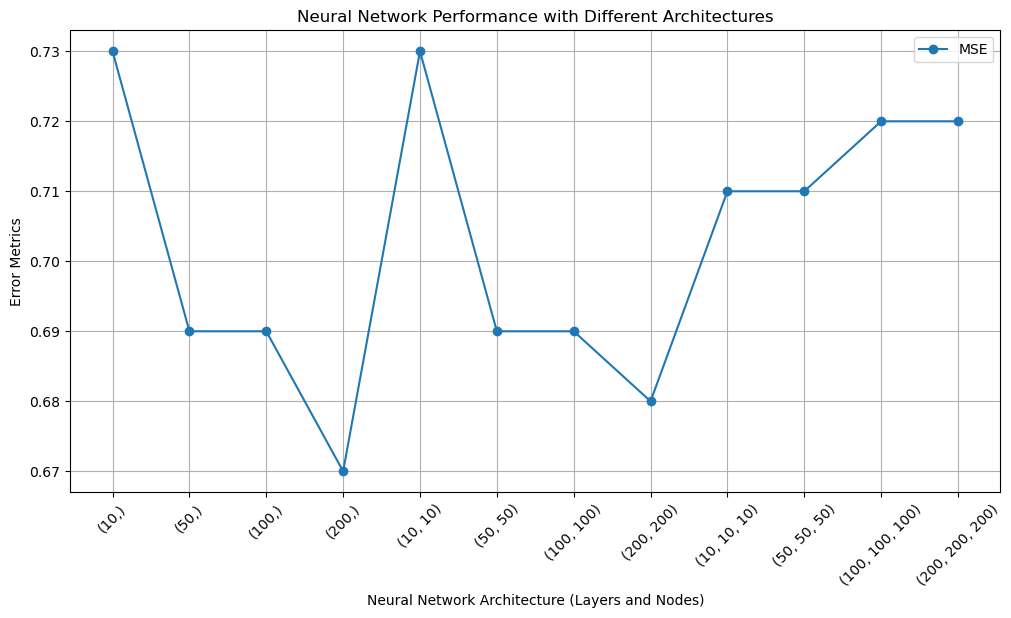

In [93]:
#Test for different Hyperparameters


X2 = db_cleaned[["connectionTime", "siteID", "spaceID", "userID", "userInputs/0/WhPerMile",  
          "userInputs/0/kWhRequested", "userInputs/0/milesRequested", 
          "userInputs/0/minutesAvailable", "userInputs/0/modifiedAt", 
          "userInputs/0/paymentRequired", "userInputs/0/requestedDeparture"]].values
y2 = db_cleaned[['disconnectTime', 'kWhDelivered', 'Load']].values

# Split dataset into train, validation, and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# Scale data
scaler = StandardScaler().fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

y_scaler = StandardScaler().fit(y2_train)
y2_train = y_scaler.transform(y2_train)
y2_test = y_scaler.transform(y2_test)

# Define layer and neuron configurations to test
layer_configs = [(10,), (50,), (100,), (200,), (10, 10), (50, 50), (100, 100), (200, 200), (10, 10, 10), (50, 50, 50), (100, 100, 100), (200, 200, 200)]
#layer_configs = [(10,10,10), (50,50,50), (100,100,100)]
results = []

for layers in layer_configs:
    print(f"Training Neural Network with layers: {layers}")
    train_nn2 = MLPRegressor(hidden_layer_sizes=layers,
                             activation='relu',
                             solver='adam',
                             alpha=0.0001,
                             max_iter=1000,
                             random_state=0)
    train_nn2.fit(X2_train, y2_train)
    
    pred_nn2 = train_nn2.predict(X2_test)
    mse = round(mean_squared_error(y2_test, pred_nn2), 2)
    mae = round(mean_absolute_error(y2_test, pred_nn2), 2)
    r2 = round(r2_score(y2_test, pred_nn2), 4)
    
    results.append((layers, mse, mae, r2))
    print(f"MSE: {mse}, MAE: {mae}, R²: {r2}\n")

# Convert results into separate lists for plotting
layers_labels = [str(l) for l, _, _, _ in results]
mse_values = [mse for _, mse, _, _ in results]
mae_values = [mae for _, _, mae, _ in results]
r2_values = [r2 for _, _, _, r2 in results]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(layers_labels, mse_values, marker='o', label='MSE')
#plt.plot(layers_labels, mae_values, marker='s', label='MAE')
#plt.plot(layers_labels, r2_values, marker='^', label='R² Score')
plt.xticks(rotation=45)
plt.xlabel("Neural Network Architecture (Layers and Nodes)")
plt.ylabel("Error Metrics")
plt.legend()
plt.title("Neural Network Performance with Different Architectures")
plt.grid()
plt.show()